In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

### Q1 Read the input file and check the data dimension

In [2]:
#Read input file and understand the data
# "default" is my dependent variable

In [3]:
df = pd.read_csv('german_credit.csv')
df.head(10)

default account_check_status  duration_in_month  \
0        0               < 0 DM                  6   
1        1    0 <= ... < 200 DM                 48   
2        0  no checking account                 12   
3        0               < 0 DM                 42   
4        1               < 0 DM                 24   
5        0  no checking account                 36   
6        0  no checking account                 24   
7        0    0 <= ... < 200 DM                 36   
8        0  no checking account                 12   
9        1    0 <= ... < 200 DM                 30   

                                      credit_history  \
0  critical account/ other credits existing (not ...   
1           existing credits paid back duly till now   
2  critical account/ other credits existing (not ...   
3           existing credits paid back duly till now   
4                    delay in paying off in the past   
5           existing credits paid back duly till now   
6           existing credits paid back duly till now   
7           existing credits paid back duly till now   
8           existing credits paid back duly till now   
9  critical account/ other credits existing (not ...   

                        purpose  credit_amount                      savings  \
0           domestic appliances           1169  unknown/ no savings account   
1           domestic appliances           5951                 ... < 100 DM   
2  (vacation - does not exist?)           2096                 ... < 100 DM   
3              radio/television           7882                 ... < 100 DM   
4                     car (new)           4870                 ... < 100 DM   
5  (vacation - does not exist?)           9055  unknown/ no savings account   
6              radio/television           2835        500 <= ... < 1000 DM    
7                    car (used)           6948                 ... < 100 DM   
8           domestic appliances           3059               .. >= 1000 DM    
9                     car (new)           5234                 ... < 100 DM   

    present_emp_since  installment_as_income_perc  \
0       .. >= 7 years                           4   
1  1 <= ... < 4 years                           2   
2  4 <= ... < 7 years                           2   
3  4 <= ... < 7 years                           2   
4  1 <= ... < 4 years                           3   
5  1 <= ... < 4 years                           2   
6       .. >= 7 years                           3   
7  1 <= ... < 4 years                           2   
8  4 <= ... < 7 years                           2   
9          unemployed                           4   

                   personal_status_sex  ... present_res_since  \
0                        male : single  ...                 4   
1  female : divorced/separated/married  ...                 2   
2                        male : single  ...                 3   
3                        male : single  ...                 4   
4                        male : single  ...                 4   
5                        male : single  ...                 4   
6                        male : single  ...                 4   
7                        male : single  ...                 2   
8            male : divorced/separated  ...                 4   
9               male : married/widowed  ...                 2   

                                            property age  \
0                                        real estate  67   
1                                        real estate  22   
2                                        real estate  49   
3  if not A121 : building society savings agreeme...  45   
4                              unknown / no property  53   
5                              unknown / no property  35   
6  if not A121 : building society savings agreeme...  53   
7  if not A121/A122 : car or other, not in attrib...  35   
8                                        real estate  61   
9  if not A121/A122 :

In [4]:
# Lets build a Ensemble model but need to modify the dataset first
df.shape

(1000, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [6]:
df.isnull().values.any()

False

In [7]:
df.isna().values.any()

False

In [8]:
df.describe().transpose()

count      mean          std    min     25%  \
default                     1000.0     0.300     0.458487    0.0     0.0   
duration_in_month           1000.0    20.903    12.058814    4.0    12.0   
credit_amount               1000.0  3271.258  2822.736876  250.0  1365.5   
installment_as_income_perc  1000.0     2.973     1.118715    1.0     2.0   
present_res_since           1000.0     2.845     1.103718    1.0     2.0   
age                         1000.0    35.546    11.375469   19.0    27.0   
credits_this_bank           1000.0     1.407     0.577654    1.0     1.0   
people_under_maintenance    1000.0     1.155     0.362086    1.0     1.0   

                               50%      75%      max  
default                        0.0     1.00      1.0  
duration_in_month             18.0    24.00     72.0  
credit_amount               2319.5  3972.25  18424.0  
installment_as_income_perc     3.0     4.00      4.0  
present_res_since              3.0     4.00      4.0  
age                           33.0    42.00     75.0  
credits_this_bank              1.0     2.00      4.0  
people_under_maintenance       1.0     1.00      2.0

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [9]:
df1=pd.get_dummies(df)
df1.head()

default  duration_in_month  credit_amount  installment_as_income_perc  \
0        0                  6           1169                           4   
1        1                 48           5951                           2   
2        0                 12           2096                           2   
3        0                 42           7882                           2   
4        1                 24           4870                           3   

   present_res_since  age  credits_this_bank  people_under_maintenance  \
0                  4   67                  2                         1   
1                  2   22                  1                         1   
2                  3   49                  1                         2   
3                  4   45                  1                         2   
4                  4   53                  2                         2   

   account_check_status_0 <= ... < 200 DM  account_check_status_< 0 DM  ...  \
0                                       0                            1  ...   
1                                       1                            0  ...   
2                                       0                            0  ...   
3                                       0                            1  ...   
4                                       0                            1  ...   

   housing_own  housing_rent  \
0            1             0   
1            1             0   
2            1             0   
3            0             0   
4            0             0   

   job_management/ self-employed/ highly qualified employee/ officer  \
0                                                  0                   
1                                                  0                   
2                                                  0                   
3                                                  0                   
4                                                  0                   

   job_skilled employee / official  job_unemployed/ unskilled - non-resident  \
0                                1                                         0   
1                                1                                         0   
2                                0                                         0   
3                                1                                         0   
4                                1                                         0   

   job_unskilled - resident  telephone_none  \
0                         0               0   
1                         0               1   
2                         1               1   
3                         0               1   
4                         0               1   

   telephone_yes, registered under the customers name   foreign_worker_no  \
0                                                  1                    0   
1                                                  0                    0   
2                                                  0                    0   
3                                                  0                    0   
4                                                  0                    0   

   foreign_worker_yes  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  

[5 rows x 62 columns]

In [10]:
df1.shape
# Print Shape of model data

(1000, 62)

### Check for highly correlated variables but don't required any treatment for this use case

In [11]:
corr = df.corr()

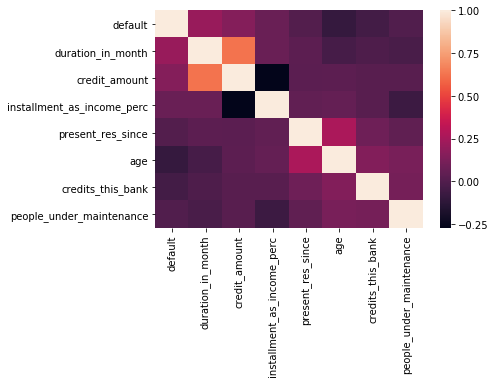

In [12]:
sns.heatmap(corr)

### Drop the original variables which are converted to dummy

pd.get_dummies()does that already

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [13]:
X = df1.drop("default" , axis=1)
y = df1['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=101)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=2,n_estimators = 500,max_depth=7,criterion="entropy",random_state=9999)
rfc = rfc.fit(X_train, y_train)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [15]:
from sklearn import metrics
y_predict = rfc.predict(X_test)
print("Accuracy on train set: ",rfc.score(X_train , y_train))
print("Accuracy on test set: ",rfc.score(X_test , y_test))
print("Confusion matrix: \n",metrics.confusion_matrix(y_test, y_predict))

Accuracy on train set:  0.8728571428571429
Accuracy on test set:  0.74
Confusion matrix: 
 [[201   3]
 [ 75  21]]


### Q6 Show the list of the features importance( 1 Marks)

In [16]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

importance
account_check_status_no checking account              0.105185
credit_amount                                         0.086089
duration_in_month                                     0.084438
age                                                   0.064776
account_check_status_< 0 DM                           0.053097
installment_as_income_perc                            0.027656
savings_... < 100 DM                                  0.026932
credit_history_critical account/ other credits ...    0.026730
present_res_since                                     0.026647
account_check_status_0 <= ... < 200 DM                0.022464
credit_history_all credits at this bank paid ba...    0.020990
savings_unknown/ no savings account                   0.020797
credits_this_bank                                     0.014355
purpose_car (used)                                    0.014251
other_installment_plans_none                          0.014044
housing_own                                           0.013926
other_installment_plans_bank                          0.013920
job_skilled employee / official                       0.013216
property_real estate                                  0.012983
present_emp_since_4 <= ... < 7 years                  0.012873
credit_history_no credits taken/ all credits pa...    0.012599
property_unknown / no property                        0.012569
job_management/ self-employed/ highly qualified...    0.012337
personal_status_sex_male : single                     0.011919
purpose_car (new)                                     0.011590
telephone_yes, registered under the customers n...    0.011023
purpose_domestic appliances                           0.010993
personal_status_sex_female : divorced/separated...    0.010990
property_if not A121/A122 : car or other, not i...    0.010756
property_if not A121 : building society savings...    0.010490
...                                                        ...
other_debtors_guarantor                               0.010338
telephone_none                                        0.010091
credit_history_existing credits paid back duly ...    0.009911
present_emp_since_unemployed                          0.009527
present_emp_since_1 <= ... < 4 years                  0.009427
present_emp_since_.. >= 7 years                       0.009257
present_emp_since_... < 1 year                        0.009109
account_check_status_>= 200 DM / salary assignm...    0.009023
purpose_business                                      0.008763
job_unskilled - resident                              0.008727
people_under_maintenance                              0.008197
purpose_radio/television                              0.008133
other_debtors_none                                    0.008082
personal_status_sex_male : divorced/separated         0.007982
purpose_(vacation - does not exist?)                  0.007510
housing_for free                                      0.007302
credit_history_delay in paying off in the past        0.007048
other_debtors_co-applicant                            0.006269
savings_100 <= ... < 500 DM                           0.005216
other_installment_plans_stores                        0.005116
savings_500 <= ... < 1000 DM                          0.004994
foreign_worker_yes                                    0.004753
personal_status_sex_male : married/widowed            0.004560
foreign_worker_no                                     0.004308
savings_.. >= 1000 DM                                 0.004199
job_unemployed/ unskilled - non-resident              0.002897
purpose_repairs                                       0.002552
purpose_furniture/equipment                           0.002509
purpose_education                                     0.002253
purpose_retraining                                    0.000967

[61 rows x 1 columns]

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [18]:
# Use below values
num_folds = 10
seed = 77

In [19]:
#Validate the Random Forest model build above using k fold

In [20]:
from sklearn.model_selection import cross_val_score, cross_val_predict

scores = cross_val_score(rfc, X_train, y_train, cv=num_folds)
print("Cross-validated scores:" , scores)

Cross-validated scores: [0.76056338 0.70422535 0.73239437 0.74647887 0.8        0.71428571
 0.73913043 0.73913043 0.75362319 0.76811594]


In [21]:
#Calculate Mean score

In [22]:
print("Average score:" , np.average(scores))

Average score: 0.7457947686116699


In [23]:
# Calculate score standard deviation using std()

In [24]:
print("Standard Deviation:" , np.std(scores))

Standard Deviation: 0.0258950580364021


# Q8 Print the confusion matrix( 1 Marks)

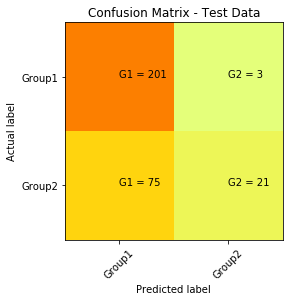

In [25]:
import matplotlib.pyplot as plt
import numpy as np

cm = metrics.confusion_matrix(y_test, y_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Group1', 'Group2']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

In [26]:
correct_predictions = metrics.accuracy_score(y_test, y_predict)
print("Correct Predictions %: ",correct_predictions*100)

Correct Predictions %:  74.0


In [27]:
recall = metrics.recall_score(y_test,y_predict)
print("Recall Score: ",recall)

Recall Score:  0.21875


In [28]:
precision = metrics.precision_score(y_test,y_predict)
print("Precision Score: ",precision)

Precision Score:  0.875


[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [29]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [30]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfc.fit(X_, y_)
    y_pred = rfc.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [31]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7256666666666667
Standard deviation:  0.009893881386437216
